## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [2]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

Sintassi del comando errata.
"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"unzip" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [3]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# can use the below import should you choose to initialize the weights of your Net
import torch.nn.init as I

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        ######################################
        ## Define all the layers of this CNN, the only requirements are:
        ## 1. This network takes in a square (same width and height), grayscale image as input
        ## 2. It ends with a linear layer that represents the keypoints
        ## Last layer output 136 values, 2 for each of the 68 keypoint (x, y) pairs
        
        # 1 input image channel (grayscale), 32 output channels/feature maps, 5x5 square convolution kernel
        
        
        ## Shape of a Convolutional Layer
        # K - out_channels : the number of filters in the convolutional layer
        # F - kernel_size
        # S - the stride of the convolution
        # P - the padding
        # W - the width/height (square) of the previous layer
        
        # Since there are F*F*D weights per filter
        # The total number of weights in the convolutional layer is K*F*F*D
        
        # 224 by 224 pixels
        # the output Tensor for one image, will have the dimensions: (1, 224, 224)
        
        ## self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(1, 32, 5)
        # output size = (W-F)/S +1 = (224-5)/1 +1 = 220
        # the output Tensor for one image, will have the dimensions: (32, 220, 220)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.conv1.weight)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool1 = nn.MaxPool2d(2, 2)
        # 220/2 = 110
        # the output Tensor for one image, will have the dimensions: (32, 110, 110)
        
        ## self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # output size = (W-F)/S +1 = (110-3)/1 + 1 = 108
        # the output Tensor for one image, will have the dimensions: (64, 108, 108)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.conv2.weight)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool2 = nn.MaxPool2d(2, 2)
        # 108/2 = 54
        # the output Tensor for one image, will have the dimensions: (64, 54, 54)
        
        ## self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv3 = nn.Conv2d(64, 128, 3)
        # output size = (W-F)/S +1 = (54-3)/1 + 1 = 52
        # the output Tensor for one image, will have the dimensions: (128, 52, 52)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.conv3.weight)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool3 = nn.MaxPool2d(2, 2)
        # 52/2 = 26
        # the output Tensor for one image, will have the dimensions: (128, 26, 26)
        
        ## self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv4 = nn.Conv2d(128, 256, 3)
        # output size = (W-F)/S +1 = (26-3)/1 + 1 = 24
        # the output Tensor for one image, will have the dimensions: (256, 24, 24)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.conv4.weight)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool4 = nn.MaxPool2d(2, 2)
        # 24/2 = 12
        # the output Tensor for one image, will have the dimensions: (256, 12, 12)
        
        ## self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv5 = nn.Conv2d(256, 512, 3)
        # output size = (W-F)/S +1 = (12-3)/1 + 1 = 10
        # the output Tensor for one image, will have the dimensions: (512, 10, 10)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.conv5.weight)
        
        # maxpool layer
        # pool with kernel_size=2, stride=2
        #self.pool5 = nn.MaxPool2d(2, 2)
        # 10/2 = 5
        # the output Tensor for one image, will have the dimensions: (512, 5, 5)
        
        # Fully-connected (linear) layers
        self.fc1 = nn.Linear(512*10*10, 1024)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.fc1.weight)
        
        self.fc2 = nn.Linear(1024, 512)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.fc2.weight)
        
        self.fc3 = nn.Linear(512, 68*2)
        
        # Initialize the weights by performing Xavier initialization
        nn.init.xavier_normal_(self.fc3.weight)
        
        # Dropout
        self.dropout = nn.Dropout(p=0.25)

        
    def forward(self, x):
        ###################################
        ## Define the feedforward behavior of this model
        ## x is the input image and, as an example, here you may choose to include a pool/conv step:
        
        # 5 conv/relu + pool layers
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        # x = self.pool5(F.relu(self.conv5(x)))
        x = F.relu(self.conv5(x))
        
        # Prep for linear layer / Flatten
        x = x.view(x.size(0), -1)
        
        # linear layers with dropout in between
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [5]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
#from models import Net ## not working in local

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=51200, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=136, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [6]:
class RandomHorizontalFlip(object):
    '''
    Horizontally flip image randomly with given probability
    Args:
        p (float): probability of the image being flipped.
                   Defalut value = 0.5
    '''
    
    def __init__(self, p=0.5):
        self.p = p

    def __call__(self, sample):        
        image, keypoints = sample['image'], sample['keypoints']
        #print(sample['image'].shape)
        #print(sample['keypoints'].shape)
        #fig = plt.figure(figsize=(4,4))
        #plt.imshow(image, cmap='gray')
        #plt.scatter(keypoints[:, 0], keypoints[:, 1], s=20, marker='.', c='m')
        
        if np.random.random() < self.p:
            image = image[:, ::-1]
            if keypoints is not None:
                i = 0
                for x, y in keypoints:
                    #print('X: ', x)
                    #print('Y: ', y)
                    #print('Half Mark: ', image.shape[1]/2)                    
                    x = image.shape[1]/2 + (image.shape[1]/2 - x)
                    #print('flipped X: ', x)
                    
                    keypoints[i, 0] = x
                    #keypoints[i, 1] = y
                    i = i+1
        
        #fig = plt.figure(figsize=(4,4))
        #plt.imshow(image, cmap='gray')
        #plt.scatter(keypoints[:, 0], keypoints[:, 1], s=20, marker='.', c='m')
        return {'image': image, 'keypoints': keypoints}


Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


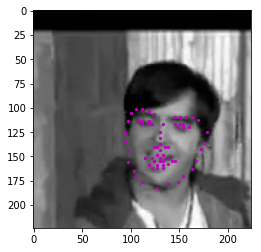

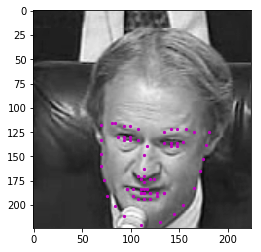

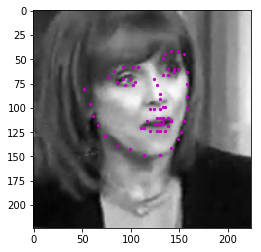

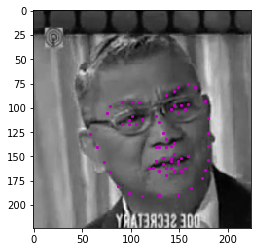

In [47]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
flipped_data_transform = transforms.Compose([Rescale(250),
                                    RandomCrop(224),
                                    RandomHorizontalFlip(p=1.0),
                                    Normalize(),
                                    ToTensor()])



# testing that you've defined a transform
assert(flipped_data_transform is not None), 'Define a data_transform'

# create the transformed dataset
flipped_transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=flipped_data_transform)


print('Number of images: ', len(flipped_transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = flipped_transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())
    
    plt.figure(figsize=(4,4))
    image = sample['image'].data   # get the image from it's Variable wrapper
    image = image.numpy()   # convert to numpy array from a Tensor
    image = np.squeeze(np.transpose(image, (1, 2, 0)))   # transpose to go from torch to numpy image
    
    # un-transform the predicted key_pts data
    key_pts = sample['keypoints'].data
    key_pts = key_pts.numpy()
    # undo normalization of keypoints  
    key_pts = key_pts*50.0+100
    
    plt.imshow(image, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

In [48]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                    RandomCrop(224),
                                    Normalize(),
                                    ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


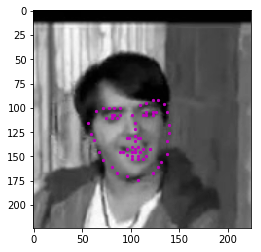

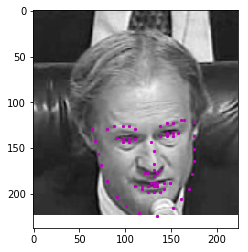

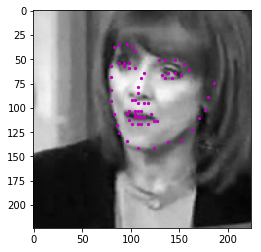

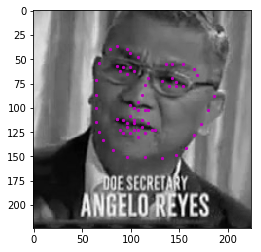

In [49]:
# create the transformed dataset
my_transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


print('Number of images: ', len(my_transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = my_transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())
    
    plt.figure(figsize=(4,4))
    image = sample['image'].data   # get the image from it's Variable wrapper
    image = image.numpy()   # convert to numpy array from a Tensor
    image = np.squeeze(np.transpose(image, (1, 2, 0)))   # transpose to go from torch to numpy image
    
    # un-transform the predicted key_pts data
    key_pts = sample['keypoints'].data
    key_pts = key_pts.numpy()
    # undo normalization of keypoints  
    key_pts = key_pts*50.0+100
    
    plt.imshow(image, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

In [10]:
import random

# create the validation dataset by splitting the training dataset (transformed_dataset)
# the last 300 (10%) images will be the validation dataset
transformed_dataset = []
validation_dataset = []
for i in range(len(my_transformed_dataset)):
    #print(i)
    if i < len(my_transformed_dataset)-300:
        sample = my_transformed_dataset[i]
        transformed_dataset.append(sample)
    else:
        sample = my_transformed_dataset[i]
        validation_dataset.append(sample)

# Adding sample from the Augmented Dataset to the Original dataset -> Data Augmentation
#transformed_dataset.extend(random.choices(flipped_transformed_dataset, k=500))

# iterate through the transformed dataset and print some stats about the first few samples
print('Training Dataset')
print('Number of images: ', len(transformed_dataset))
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

# iterate through the transformed dataset and print some stats about the first few samples
print('Validation Dataset')
print('Number of images: ', len(validation_dataset))
for i in range(4):
    val_sample = validation_dataset[i]
    print(i, val_sample['image'].size(), val_sample['keypoints'].size())

Training Dataset
Number of images:  6324
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])
Validation Dataset
Number of images:  600
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [11]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


In [12]:
# load validation data in batches
batch_size = 10

validation_loader = DataLoader(validation_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [13]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)



In [14]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [15]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

In [38]:
# test the model on a batch of test images

def net_train_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(train_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [43]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()
my_train_images, my_train_output, train_gt_pts = net_train_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [17]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

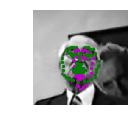

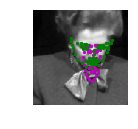

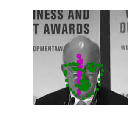

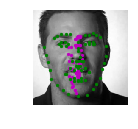

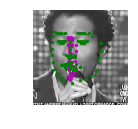

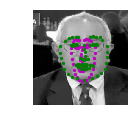

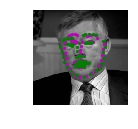

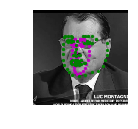

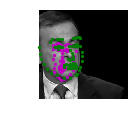

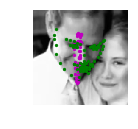

In [44]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

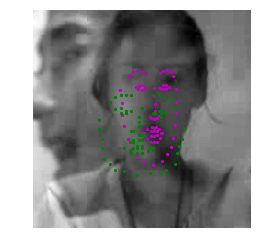

In [50]:
# visualize the output
# by default this shows one images
def visualize_one_output(test_images, test_outputs, gt_pts=None):

    plt.figure(figsize=(4,4))
    
    # un-transform the image data
    image = test_images.data   # get the image from it's wrapper
    image = image.numpy()   # convert to numpy array from a Tensor
    image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

    # un-transform the predicted key_pts data
    predicted_key_pts = test_outputs.data
    predicted_key_pts = predicted_key_pts.numpy()
    # undo normalization of keypoints  
    predicted_key_pts = predicted_key_pts*50.0+100

    # plot ground truth points for comparison, if they exist
    ground_truth_pts = None
    if gt_pts is not None:
        ground_truth_pts = gt_pts         
        ground_truth_pts = ground_truth_pts*50.0+100

    # call show_all_keypoints
    show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)

    plt.axis('off')

    plt.show()
    
# call it
visualize_one_output(my_train_images[0], my_train_output[0], train_gt_pts[0])

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [19]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss() # nn.MSELoss() #nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr = 0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [20]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()
    training_loss = []
    validation_loss = []

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0
        val_running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                #running_loss = 0.0
                #val_running_loss = 0.0
                # computing the validation loss
                with torch.no_grad():
                    # val_running_loss = 0.0
                    for val_batch_i, val_data in enumerate(validation_loader):
                        print(val_batch_i)
                        # get the input images and their corresponding labels
                        val_images = val_data['image']
                        val_key_pts = val_data['keypoints']

                        # flatten pts
                        val_key_pts = val_key_pts.view(val_key_pts.size(0), -1)

                        # convert variables to floats for regression loss
                        val_key_pts = val_key_pts.type(torch.FloatTensor)
                        val_images = val_images.type(torch.FloatTensor)

                        # forward pass to get outputs
                        val_output_pts = net(val_images)

                        # calculate the loss between predicted and target keypoints
                        val_loss = criterion(val_output_pts, val_key_pts)
                        val_running_loss += val_loss.item()
                        #print(val_batch_i)
                    
                print('Epoch: {}, Batch: {}, Avg. Loss: {}, Avg. Val Loss {}'.format(epoch + 1, batch_i+1, running_loss/10, val_running_loss/30))
                training_loss.append(running_loss/10)
                validation_loss.append(val_running_loss/35) # 35 is the number of images in the validation dataset divided by the batch size
                running_loss = 0.0
                val_running_loss = 0.0
        
        #training_loss.append(running_loss)
        #validation_loss.append(val_running_loss)

    print('Finished Training')
    return training_loss, validation_loss


In [21]:
def train_net_optimized(n_epochs):

    train_losses = []
    valid_losses = []
    
    train_losses_test = []
    valid_losses_test = []
    
    training_loss_to_print = []
    validation_loss_to_print = []
    

    for epoch in range(n_epochs):
        # monitor training loss
        running_loss = 0.0
        running_loss_to_print = 0.0
        val_running_loss = 0.0
        val_running_loss_to_print = 0.0

        ###################
        # train the model #
        ###################
        net.train() # prep model for training
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']
            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)
            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)
            # forward pass to get outputs
            output_pts = net(images)
            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)
            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            # backward pass to calculate the weight gradients
            loss.backward()
            # update the weights
            optimizer.step()
            running_loss += loss.item()
            train_losses_test.append(loss.item())
            running_loss_to_print += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss_to_print/10))
                training_loss_to_print.append(running_loss_to_print/10)
                running_loss_to_print = 0.0
                

        ######################    
        # validate the model #
        ######################
        net.eval() # prep model for evaluation
        for val_batch_i, val_data in enumerate(validation_loader):
            # get the input images and their corresponding labels
            val_images = val_data['image']
            val_key_pts = val_data['keypoints']
            # flatten pts
            val_key_pts = val_key_pts.view(val_key_pts.size(0), -1)
            # convert variables to floats for regression loss
            val_key_pts = val_key_pts.type(torch.FloatTensor)
            val_images = val_images.type(torch.FloatTensor)
            # forward pass to get outputs
            val_output_pts = net(val_images)
            # calculate the loss between predicted and target keypoints
            val_loss = criterion(val_output_pts, val_key_pts)
            val_running_loss += val_loss.item()
            valid_losses_test.append(val_loss.item())
            val_running_loss_to_print += val_loss.item()
            if val_batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Validation Avg. Loss: {}'.format(epoch + 1, val_batch_i+1, val_running_loss_to_print/10))
                validation_loss_to_print.append(val_running_loss_to_print/10)
                val_running_loss_to_print = 0.0
                val_image_sample = val_images
                val_predicted_sample = val_output_pts.view(val_output_pts.size()[0], 68, -1)
                val_key_pts_sample = val_key_pts.view(val_key_pts.size()[0], 68, -1)        
        
        # print training/validation statistics 
        # calculate average loss over an epoch
        #print(len(train_loader))
        #print(len(validation_loader))
        running_loss = running_loss/len(train_loader)
        val_running_loss = val_running_loss/len(validation_loader)

        train_losses.append(running_loss)
        valid_losses.append(val_running_loss)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}' .format(epoch+1, running_loss, val_running_loss))
        
        visualize_one_output(val_image_sample[0], val_predicted_sample[0], val_key_pts_sample[0])
            
    return train_losses, valid_losses, train_losses_test, valid_losses_test, training_loss_to_print, validation_loss_to_print

In [ ]:
def train_net_original(n_epochs):

    # prepare the net for training
    net.train()
    training_loss = []

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                training_loss.append(running_loss/10)
                running_loss = 0.0

        #training_loss.append(running_loss)

    print('Finished Training')
    return training_loss

In [22]:
# train your network 
n_epochs = 10 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
#with active_session():
    # training_loss, validation_loss = train_net(n_epochs) --> DataLoader worker (pid 250) is killed by signal: Bus error.
    # training_loss = train_net_original(n_epochs)
training_loss, validation_loss, train_losses_test, valid_losses_test, training_loss_to_print, validation_loss_to_print = train_net_optimized(n_epochs)

Epoch: 1, Batch: 10, Avg. Loss: 0.24633558988571166
Epoch: 1, Batch: 20, Avg. Loss: 0.193132483959198
Epoch: 1, Batch: 30, Avg. Loss: 0.15658901482820511
Epoch: 1, Batch: 40, Avg. Loss: 0.1733001984655857
Epoch: 1, Batch: 50, Avg. Loss: 0.15146960243582724
Epoch: 1, Batch: 60, Avg. Loss: 0.16019729822874068
Epoch: 1, Batch: 70, Avg. Loss: 0.14927247017621995
Epoch: 1, Batch: 80, Avg. Loss: 0.171400810778141
Epoch: 1, Batch: 90, Avg. Loss: 0.15271643847227095
Epoch: 1, Batch: 100, Avg. Loss: 0.1625305972993374
Epoch: 1, Batch: 110, Avg. Loss: 0.14200852438807487
Epoch: 1, Batch: 120, Avg. Loss: 0.15968352258205415
Epoch: 1, Batch: 130, Avg. Loss: 0.1708722397685051
Epoch: 1, Batch: 140, Avg. Loss: 0.16131612956523894
Epoch: 1, Batch: 150, Avg. Loss: 0.1724598675966263
Epoch: 1, Batch: 160, Avg. Loss: 0.16116956025362014
Epoch: 1, Batch: 170, Avg. Loss: 0.15469811335206032
Epoch: 1, Batch: 180, Avg. Loss: 0.15950415879487992
Epoch: 1, Batch: 190, Avg. Loss: 0.1513093128800392
Epoch: 1, B

Epoch: 3, Batch: 150, Avg. Loss: 0.12828459963202477
Epoch: 3, Batch: 160, Avg. Loss: 0.12325525432825088
Epoch: 3, Batch: 170, Avg. Loss: 0.12271455898880959
Epoch: 3, Batch: 180, Avg. Loss: 0.11671910807490349
Epoch: 3, Batch: 190, Avg. Loss: 0.12140267342329025
Epoch: 3, Batch: 200, Avg. Loss: 0.11652333363890648
Epoch: 3, Batch: 210, Avg. Loss: 0.11742772832512856
Epoch: 3, Batch: 220, Avg. Loss: 0.11850253269076347
Epoch: 3, Batch: 230, Avg. Loss: 0.12246484905481339
Epoch: 3, Batch: 240, Avg. Loss: 0.0984548307955265
Epoch: 3, Batch: 250, Avg. Loss: 0.11601421460509301
Epoch: 3, Batch: 260, Avg. Loss: 0.11247705444693565
Epoch: 3, Batch: 270, Avg. Loss: 0.116427493840456
Epoch: 3, Batch: 280, Avg. Loss: 0.13256752118468285
Epoch: 3, Batch: 290, Avg. Loss: 0.1325274296104908
Epoch: 3, Batch: 300, Avg. Loss: 0.11195637807250022
Epoch: 3, Batch: 310, Avg. Loss: 0.11408122330904007
Epoch: 3, Batch: 320, Avg. Loss: 0.10930643305182457
Epoch: 3, Batch: 330, Avg. Loss: 0.101763206720352

Epoch: 5, Batch: 280, Avg. Loss: 0.09520103260874749
Epoch: 5, Batch: 290, Avg. Loss: 0.1084539234638214
Epoch: 5, Batch: 300, Avg. Loss: 0.10894131809473037
Epoch: 5, Batch: 310, Avg. Loss: 0.09208957776427269
Epoch: 5, Batch: 320, Avg. Loss: 0.10145309120416642
Epoch: 5, Batch: 330, Avg. Loss: 0.08752179965376854
Epoch: 5, Batch: 340, Avg. Loss: 0.10450535863637925
Epoch: 5, Batch: 350, Avg. Loss: 0.11818149387836456
Epoch: 5, Batch: 360, Avg. Loss: 0.09725071266293525
Epoch: 5, Batch: 370, Avg. Loss: 0.0999504193663597
Epoch: 5, Batch: 380, Avg. Loss: 0.11223701983690262
Epoch: 5, Batch: 390, Avg. Loss: 0.0980595052242279
Epoch: 5, Batch: 400, Avg. Loss: 0.10545177310705185
Epoch: 5, Batch: 410, Avg. Loss: 0.09530889168381691
Epoch: 5, Batch: 420, Avg. Loss: 0.0934391126036644
Epoch: 5, Batch: 430, Avg. Loss: 0.10067603141069412
Epoch: 5, Batch: 440, Avg. Loss: 0.08071849569678306
Epoch: 5, Batch: 450, Avg. Loss: 0.10034891963005066
Epoch: 5, Batch: 460, Avg. Loss: 0.091313278675079

Epoch: 7, Batch: 410, Avg. Loss: 0.07625561095774173
Epoch: 7, Batch: 420, Avg. Loss: 0.08012043088674545
Epoch: 7, Batch: 430, Avg. Loss: 0.08370101675391198
Epoch: 7, Batch: 440, Avg. Loss: 0.08141577392816543
Epoch: 7, Batch: 450, Avg. Loss: 0.07650402784347535
Epoch: 7, Batch: 460, Avg. Loss: 0.07392497137188911
Epoch: 7, Batch: 470, Avg. Loss: 0.07966525629162788
Epoch: 7, Batch: 480, Avg. Loss: 0.06826317682862282
Epoch: 7, Batch: 490, Avg. Loss: 0.07625495865941048
Epoch: 7, Batch: 500, Avg. Loss: 0.07075106985867023
Epoch: 7, Batch: 510, Avg. Loss: 0.08170167617499828
Epoch: 7, Batch: 520, Avg. Loss: 0.08563546761870384
Epoch: 7, Batch: 530, Avg. Loss: 0.08666448593139649
Epoch: 7, Batch: 540, Avg. Loss: 0.08382432088255883
Epoch: 7, Batch: 550, Avg. Loss: 0.07297882437705994
Epoch: 7, Batch: 560, Avg. Loss: 0.07966083884239197
Epoch: 7, Batch: 570, Avg. Loss: 0.08271655514836311
Epoch: 7, Batch: 580, Avg. Loss: 0.07910543270409107
Epoch: 7, Batch: 590, Avg. Loss: 0.08736605159

Epoch: 9, Batch: 540, Avg. Loss: 0.05207718908786774
Epoch: 9, Batch: 550, Avg. Loss: 0.058997183293104175
Epoch: 9, Batch: 560, Avg. Loss: 0.061212404444813726
Epoch: 9, Batch: 570, Avg. Loss: 0.061459673941135405
Epoch: 9, Batch: 580, Avg. Loss: 0.05210958421230316
Epoch: 9, Batch: 590, Avg. Loss: 0.05758276041597128
Epoch: 9, Batch: 600, Avg. Loss: 0.06508286781609059
Epoch: 9, Batch: 610, Avg. Loss: 0.06053644716739655
Epoch: 9, Batch: 620, Avg. Loss: 0.05832721441984177
Epoch: 9, Batch: 630, Avg. Loss: 0.055600528791546824
Epoch: 9, Batch: 10, Validation Avg. Loss: 0.1128554105758667
Epoch: 9, Batch: 20, Validation Avg. Loss: 0.09469403848052024
Epoch: 9, Batch: 30, Validation Avg. Loss: 0.09235035702586174
Epoch: 9, Batch: 40, Validation Avg. Loss: 0.13479117080569267
Epoch: 9, Batch: 50, Validation Avg. Loss: 0.11378723010420799
Epoch: 9, Batch: 60, Validation Avg. Loss: 0.11098936870694161
Epoch: 9 	Training Loss: 0.057038 	Validation Loss: 0.109911
Epoch: 10, Batch: 10, Avg. L

In [22]:
# train your network
#n_epochs = 10 # start small, and increase when you've decided on your model structure and hyperparams

# training_loss, validation_loss = train_net(n_epochs)
#training_loss, validation_loss = train_net_optimized(n_epochs)

Epoch: 1 	Training Loss: 0.392090 	Validation Loss: 0.360947
Epoch: 2 	Training Loss: 0.357455 	Validation Loss: 0.342436
Epoch: 3 	Training Loss: 0.336216 	Validation Loss: 0.344182
Epoch: 4 	Training Loss: 0.314612 	Validation Loss: 0.332913
Epoch: 5 	Training Loss: 0.300242 	Validation Loss: 0.319987
Epoch: 6 	Training Loss: 0.285630 	Validation Loss: 0.286445
Epoch: 7 	Training Loss: 0.267726 	Validation Loss: 0.313511
Epoch: 8 	Training Loss: 0.244586 	Validation Loss: 0.308823
Epoch: 9 	Training Loss: 0.216025 	Validation Loss: 0.317527
Epoch: 10 	Training Loss: 0.191527 	Validation Loss: 0.283634


[0.1532476254596153, 0.12656149092773314, 0.11614055820927613, 0.1070029798300722, 0.09763339811003227, 0.08857232193340434, 0.07955970260569176, 0.06842387191904194, 0.05703773742062032, 0.046350840355547686]


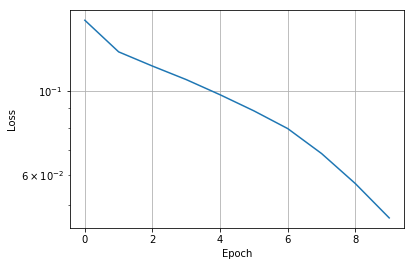

In [23]:
#print(training_loss)

# visualize the loss as the network trained
plt.figure()
plt.semilogy(training_loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss');

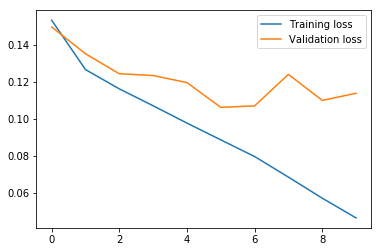

In [24]:
# plotting the training and validation loss
plt.figure()
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(train_losses_test, label='Training loss Detailed per batch')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(valid_losses_test, label='Validation loss Detailed per batch')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# visualize the loss as the network trained
plt.figure()
plt.plot(training_loss_to_print, label='Training loss Detailed during Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# visualize the loss as the network trained
plt.figure()
plt.plot(validation_loss_to_print, label='Validation loss Detailed during Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

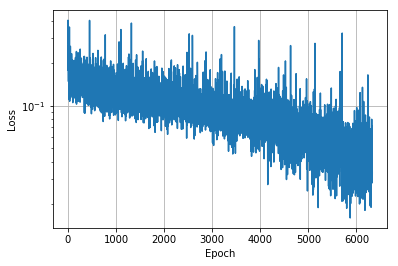

In [25]:
#print(train_losses_test)

# visualize the loss as the network trained
plt.figure()
plt.semilogy(train_losses_test)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss');

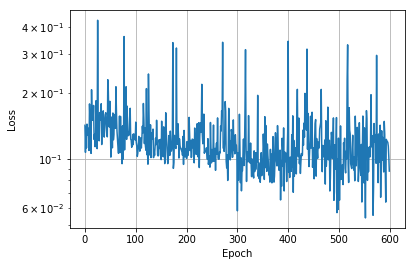

In [26]:
#print(valid_losses_test)

# visualize the loss as the network trained
plt.figure()
plt.semilogy(valid_losses_test)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss');

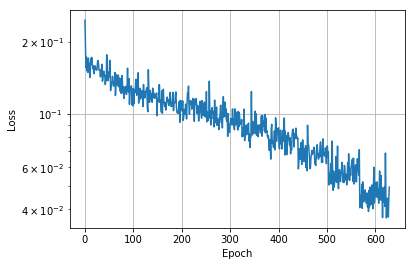

In [27]:
#print(training_loss_to_print)

# visualize the loss as the network trained
plt.figure()
plt.semilogy(training_loss_to_print)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss');

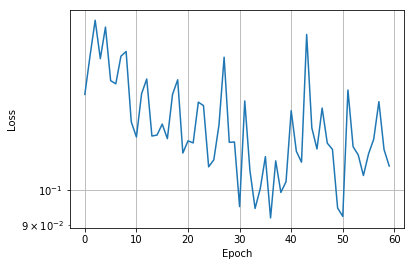

In [28]:
#print(validation_loss_to_print)

# visualize the loss as the network trained
plt.figure()
plt.semilogy(validation_loss_to_print)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss');

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [35]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()
my_train_images, my_train_output, train_gt_pts = net_train_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


Test Images


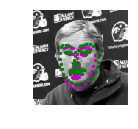

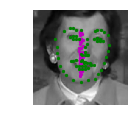

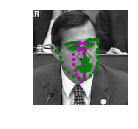

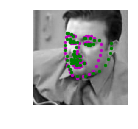

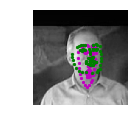

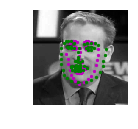

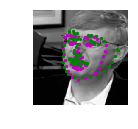

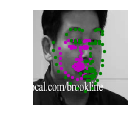

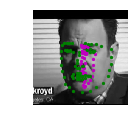

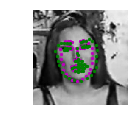

Train Images


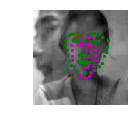

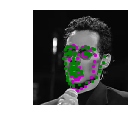

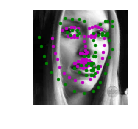

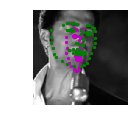

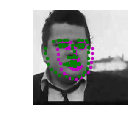

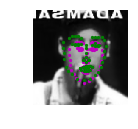

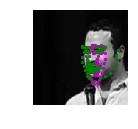

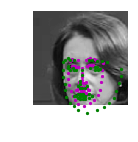

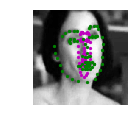

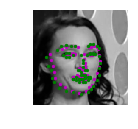

In [37]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

print('Test Images')
visualize_output(test_images, test_outputs, gt_pts)
print('Train Images')
visualize_output(my_train_images, my_train_output, train_gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

In [31]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'Smooth_10_model_val_20200812_xavier_augment.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: write your answer here (double click to edit this cell)

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: write your answer here

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: write your answer here

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.10820393 -0.05168764 -0.07664194 -0.11420119  0.01329561]
 [-0.13273713 -0.00052436 -0.06423029 -0.03838216 -0.02544447]
 [-0.10792953 -0.04087882  0.00657527 -0.07560185 -0.13240902]
 [-0.0205279  -0.00776959 -0.14207554 -0.10731515 -0.0215052 ]
 [-0.11127435 -0.11992396  0.01292837 -0.01995312 -0.03562788]]
(5, 5)


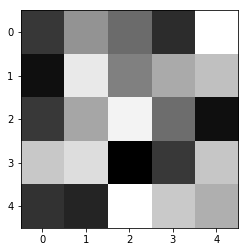

In [32]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 20

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

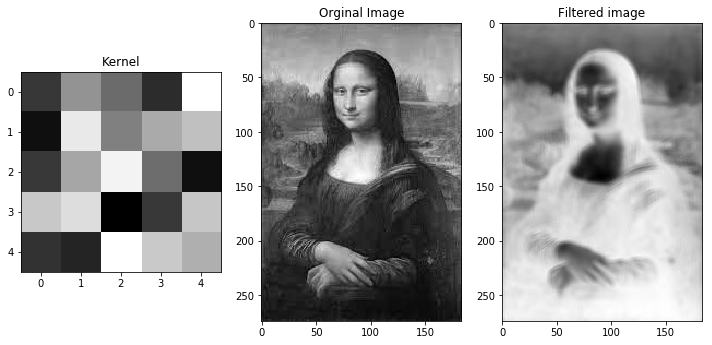

In [33]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

############
## load in and display any image from the transformed test dataset
import cv2

image = cv2.imread('images/mona_lisa.jpg')
# convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) / 255.0

## Using cv's filter2D function
filter_kernel = np.array([[ 0,  1,  1],
                          [-1,  0,  1],
                          [-1, -1,  0]])

filter_kernel = w[filter_index][0]

filtered_image = cv2.filter2D(image, -1, filter_kernel)

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
ax1.imshow(filter_kernel, cmap='gray')
ax2.imshow(image, cmap='gray')
ax3.imshow(filtered_image, cmap='gray')

ax1.set_title('Kernel')
ax2.set_title('Orginal Image')
ax3.set_title('Filtered image')
plt.tight_layout();


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: (does it detect vertical lines or does it blur out noise, etc.) write your answer here

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!